In [48]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import pandas as pd
import umap
import math as m

In [3]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

In [30]:
data_set = pd.read_csv("output.csv", index_col=0)
data_set = data_set.drop(['0.2499'], axis=1)
data_set.head()

,0.25,0.2501,0.2502,0.2503,0.2504,0.2505,0.2506,0.2507,0.2508,0.2509,...,0.9991,0.9992,0.9993,0.9994,0.9995,0.9996,0.9997,0.9998,0.9999,1.0
20.0degC,-0.095314,-0.094590,-0.093882,-0.093188,-0.092506,-0.091837,-0.091180,-0.090535,-0.089902,-0.089281,...,-0.051790,-0.051790,-0.051790,-0.051790,-0.051790,-0.051790,-0.051790,-0.051790,-0.051790,-0.051790
20.1degC,-0.095201,-0.094478,-0.093771,-0.093076,-0.092395,-0.091726,-0.091069,-0.090425,-0.089793,-0.089173,...,-0.051833,-0.051833,-0.051833,-0.051833,-0.051833,-0.051833,-0.051833,-0.051833,-0.051833,-0.051833
20.2degC,-0.095161,-0.094438,-0.093731,-0.093036,-0.092354,-0.091685,-0.091028,-0.090383,-0.089750,-0.089128,...,-0.051851,-0.051851,-0.051851,-0.051851,-0.051851,-0.051851,-0.051851,-0.051851,-0.051851,-0.051851
20.3degC,-0.095048,-0.094325,-0.093618,-0.092923,-0.092242,-0.091573,-0.090916,-0.090271,-0.089639,-0.089018,...,-0.051853,-0.051853,-0.051853,-0.051853,-0.051853,-0.051853,-0.051853,-0.051853,-0.051853,-0.051853
20.4degC,-0.094925,-0.094202,-0.093495,-0.092800,-0.092119,-0.091450,-0.090793,-0.090149,-0.089516,-0.088896,...,-0.051872,-0.051872,-0.051872,-0.051872,-0.051872,-0.051872,-0.051872,-0.051872,-0.051872,-0.051871


In [114]:
reducer = umap.UMAP(metric = 'euclidean', n_neighbors=15)

In [115]:
embedding = reducer.fit_transform(data_set)
#embedding = pd.DataFrame(embedding)
#embedding.columns = ['P1', 'P2']
#print(embedding.head())

In [102]:
clrmap = plt.cm.gist_ncar
#clrmap = plt.cm.hsv

#plt.rcParams['figure.figsize'] = [10, 10]
#plt.figure()
#for i in np.linspace(0, 1, 100):
#    plt.plot(i,i,marker='o',color=tuple(clrmap(i)))
#plt.show()

#plt.figure()
#for i in np.linspace(0.1, 0.9, len(unique_labels)):
#    plt.plot(i,i,marker='o',markersize=20,color=tuple(clrmap(i)))
#plt.show()

Number of clusters: 7


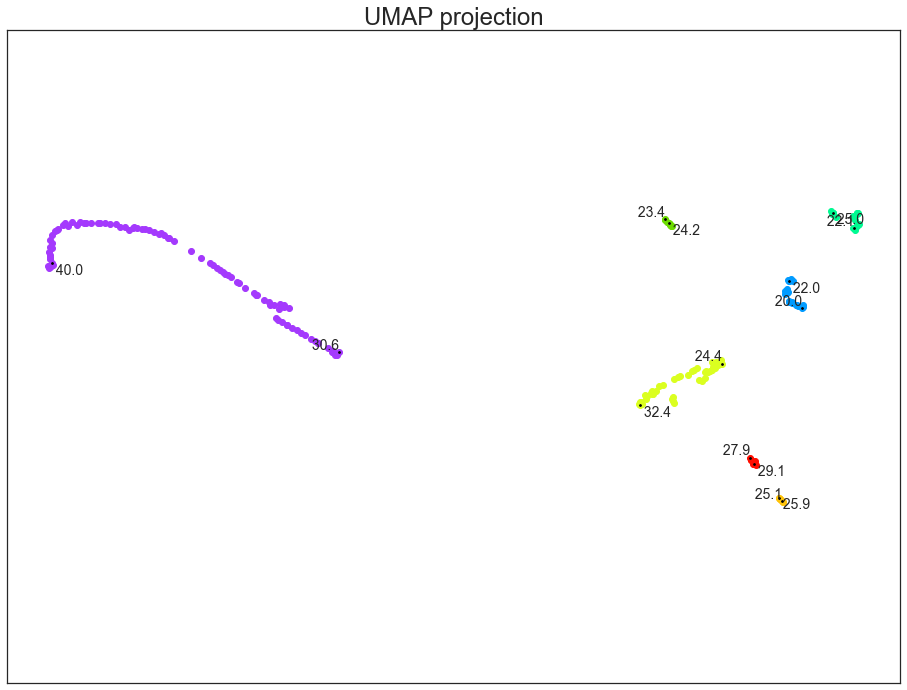

In [116]:
db = DBSCAN(eps=1, min_samples=5).fit(embedding)
labels = db.labels_
unique_labels = set(labels)
colors = [clrmap(each) for each in np.linspace(0.15, 0.85, len(unique_labels))]
print("Number of clusters: " + str(len(unique_labels)))

%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 12]
fig = plt.figure()
ax = fig.add_subplot(111)


for i in range(len(labels)):
    col = colors[labels[i]]
    ax.scatter(embedding[i][0], embedding[i][1], color=tuple(col))
    
first = []
last = []

for cluster_label in unique_labels:
    for i in range(len(labels)):
        if labels[i] == cluster_label:
            first.append(data_set.iloc[i].name)
            ax.scatter(embedding[i][0], embedding[i][1], c="black", s=3)
            label = str(data_set.iloc[i].name)
            ax.annotate(" "+label[:4], xy=(embedding[i][0], embedding[i][1]), 
                        fontsize = 14, horizontalalignment='right', verticalalignment='bottom')
            break
    for i in range(len(labels)-1, -1, -1):
        if labels[i] == cluster_label:
            last.append(data_set.iloc[i].name)
            ax.scatter(embedding[i][0], embedding[i][1], c="black", s=3)
            label = str(data_set.iloc[i].name)
            ax.annotate(" "+label[:4], xy=(embedding[i][0], embedding[i][1]), 
                        fontsize = 14, verticalalignment='top')
            break

#plt.xlim([-10,20])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection', fontsize=24)
ax.set(xticklabels=[])
ax.set(yticklabels=[])
plt.show()


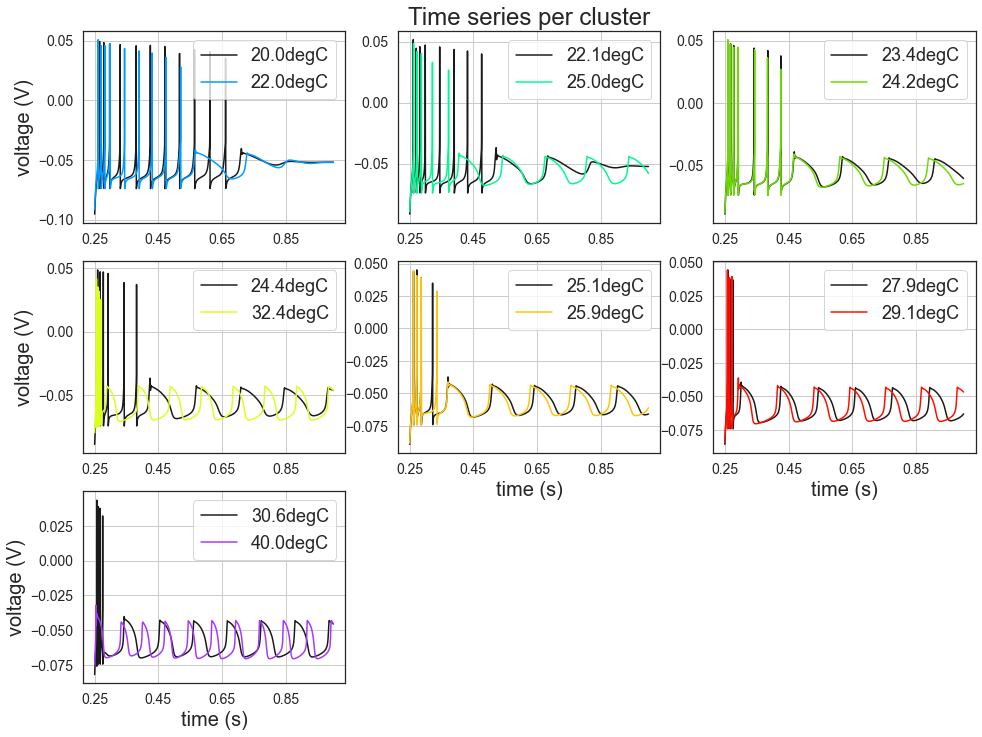

In [117]:
%matplotlib inline
n = m.ceil(m.sqrt(len(unique_labels)))
plt.rcParams['figure.figsize'] = [16, 12]
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
#plt.rc('font', size=22)

data_setT = pd.DataFrame.transpose(data_set)
colors_low = [clrmap(each-0.05) for each in np.linspace(0.05, 0.85, len(unique_labels))]
colors_high = [clrmap(each+0.05) for each in np.linspace(0.05, 0.85, len(unique_labels))]

fig = plt.figure()
plt.title('Time series per cluster', fontsize=24)
plt.box(on=None)
plt.axis('off')


for cluster_label in unique_labels:
    ax = fig.add_subplot(n, n, cluster_label+1)
    col = colors[cluster_label]
    col_low = colors_low[cluster_label]
    col_high = colors_high[cluster_label]
    #data_setT[[first[cluster_label], last[cluster_label]]].plot(color={tuple(col_low),tuple(col_high)})  
    data_setT[first[cluster_label]].plot(color='k') 
    data_setT[last[cluster_label]].plot(color=tuple(col)) 
    if cluster_label >= len(unique_labels)-n:
        plt.xlabel('time (s)', fontsize=20)
    if int((cluster_label + 1) % 3) == 1:
        plt.ylabel('voltage (V)', fontsize=20)
    ax.legend([first[cluster_label], last[cluster_label]], fontsize=18)
    ax.grid(True)
    #ax.set_xticks([0.25*5000, 0.5*5000, 0.75*5000, 1.0*5000])
    #ax.set_xticklabels(["0.25", "0.5", "0.75", "1.0"])
    #plt.title('Lowest and highest temperature samples belonging to cluster '+str(cluster_label), color=tuple(col))


plt.show()